In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_f = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font',family=font_f)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')
import folium

In [2]:
shop = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/Untitled Folder 1\csv데이터\소상공인시장진흥공단_상가업소정보_201806_02.csv",encoding='cp949')
shop.shape

(447077, 39)

In [3]:
shop['시도명'].value_counts()

인천광역시      119223
대구광역시      111016
대전광역시       80059
광주광역시       77611
울산광역시       49918
세종특별자치시      9250
Name: 시도명, dtype: int64

In [4]:
shop_incheon = shop.loc[shop['시도명'] == '인천광역시']
shop_daegoo = shop.loc[shop['시도명'] == '대구광역시']
shop_guang = shop.loc[shop['시도명'] == '광주광역시']
shop_ulsan = shop.loc[shop['시도명'] == '울산광역시']
shop_daegoo = shop.loc[shop['시도명'] == '대구광역시']

In [5]:
shop['상권업종대분류명'].unique()

array(['음식', '숙박', '소매', '생활서비스', '학문/교육', '부동산', '관광/여가/오락', '의료', '스포츠'],
      dtype=object)

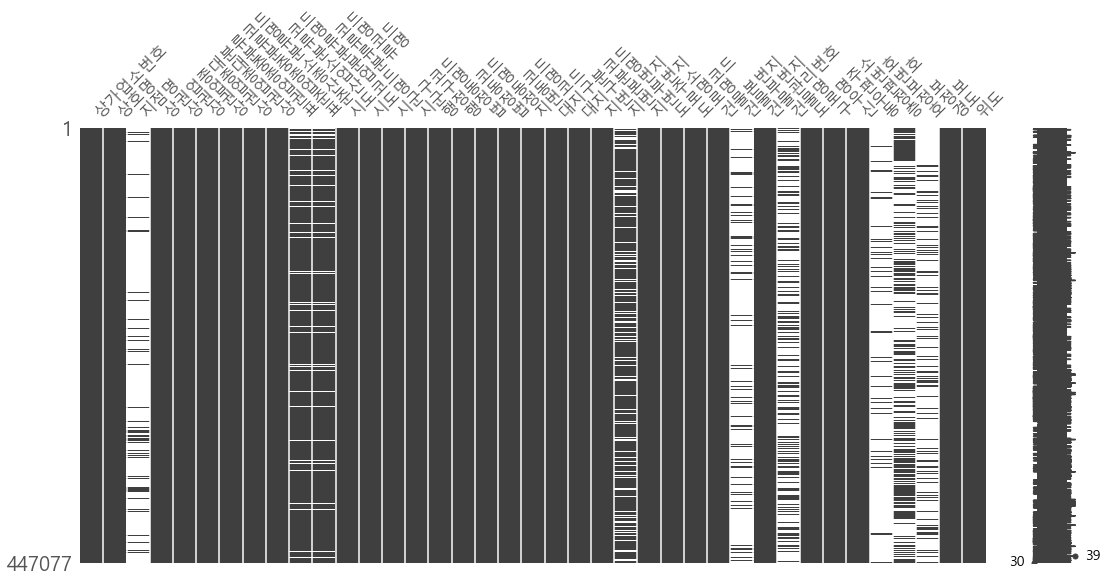

In [6]:
import missingno
missingno.matrix(shop,figsize=(18,8))

In [7]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
shop['상권업종대분류명'].unique()

array(['음식', '숙박', '소매', '생활서비스', '학문/교육', '부동산', '관광/여가/오락', '의료', '스포츠'],
      dtype=object)

In [9]:
shop['시도명'].value_counts()

인천광역시      119223
대구광역시      111016
대전광역시       80059
광주광역시       77611
울산광역시       49918
세종특별자치시      9250
Name: 시도명, dtype: int64

In [10]:
shop['상권업종대분류명'].value_counts()

소매          145940
음식          144200
생활서비스        72354
학문/교육        36637
의료           14934
부동산          14484
관광/여가/오락     13704
숙박            4759
스포츠             65
Name: 상권업종대분류명, dtype: int64

인천의 경우에는 소매 업종이 음식 업종보다 더 많이 분포하고 있다.그리고 음식 , 생활서비스 순으로 이어지고 있다. 


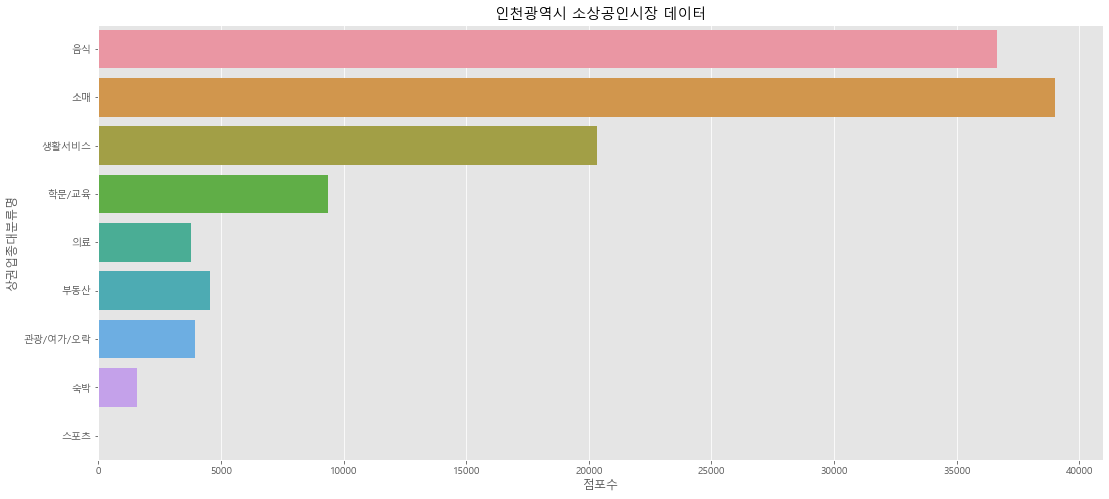

In [11]:
fig,ax1=plt.subplots()
fig.set_size_inches(18,8)

sns.countplot(data=shop_incheon,y='상권업종대분류명',order=['음식','소매','생활서비스','학문/교육',
'의료','부동산','관광/여가/오락','숙박','스포츠'],ax=ax1)
ax1.set_title("인천광역시 소상공인시장 데이터")
ax1.set_xlabel("점포수")

print("인천의 경우에는 소매 업종이 음식 업종보다 더 많이 분포하고 있다.그리고 음식 , 생활서비스 순으로 이어지고 있다. ")

In [12]:
shop_incheon_somae = shop_incheon.loc[shop_incheon['상권업종대분류명'] == '소매'].copy()
shop_incheon_somae.shape

(38995, 39)

종합소매점이 상권업종중분류에서 가장 많고 두번째로는 의복의류 세번째로는 음식료품소매점이 많다.


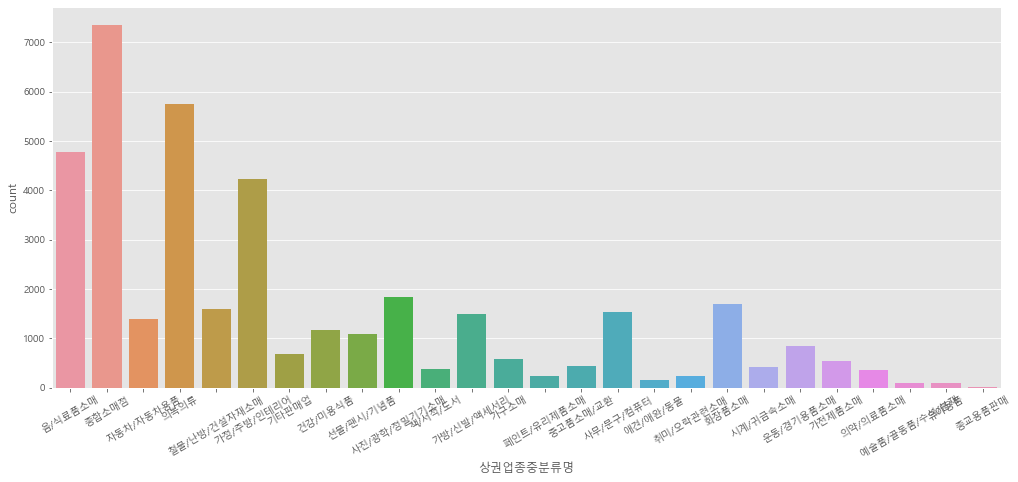

In [13]:
fig,ax4=plt.subplots()
fig.set_size_inches(17,7)

plt.sca(ax4)
plt.xticks(rotation=30)
sns.countplot(data=shop_incheon_somae,x='상권업종중분류명',ax=ax4)

shop_incheon_somae_jonghab = shop_incheon_somae.loc[shop_incheon_somae['상권업종중분류명'] == '종합소매점']
print("종합소매점이 상권업종중분류에서 가장 많고 두번째로는 의복의류 세번째로는 음식료품소매점이 많다.")

In [14]:
shop_incheon_somae['상권업종중분류명'].value_counts()

종합소매점            7346
의복의류             5749
음/식료품소매          4772
가정/주방/인테리어       4225
사진/광학/정밀기기소매     1846
화장품소매            1705
철물/난방/건설자재소매     1585
사무/문구/컴퓨터        1530
가방/신발/액세서리       1494
자동차/자동차용품        1388
건강/미용식품          1172
선물/팬시/기념품        1079
운동/경기용품소매         842
기타판매업             689
가구소매              590
가전제품소매            539
중고품소매/교환          437
시계/귀금속소매          422
책/서적/도서           376
의약/의료품소매          361
취미/오락관련소매         239
페인트/유리제품소매        238
애견/애완/동물          158
유아용품              104
예술품/골동품/수석/분재      88
종교용품판매             21
Name: 상권업종중분류명, dtype: int64

In [15]:
shop_incheon_somae_jonghab = shop_incheon_somae.loc[shop_incheon_somae['상권업종중분류명'] == '종합소매점']

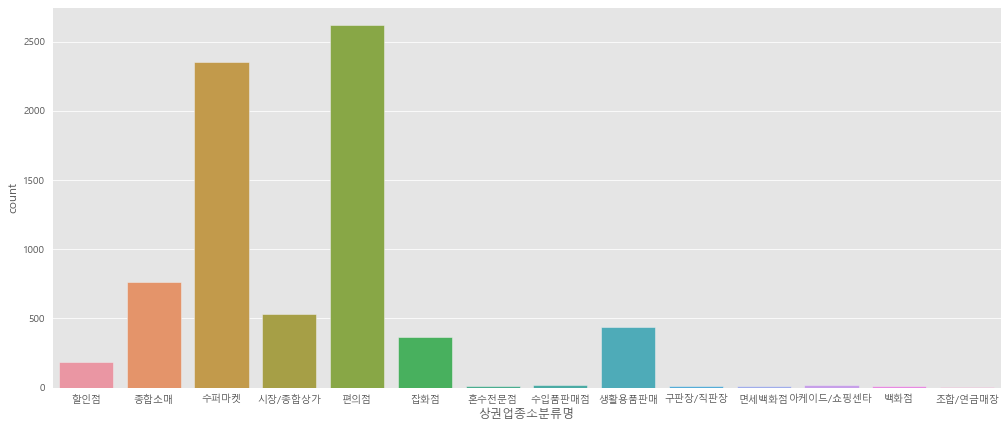

In [72]:
fig,ax5=plt.subplots()
fig.set_size_inches(17,7)

sns.countplot(data=shop_incheon_somae_jonghab,x='상권업종소분류명',ax=ax5)
print("상권업종소분류명으로 살펴보면 인천시내에 있는 종합소매점은 편의점과 수퍼마켓이 가장 많은 것을 알 수 있다.")

In [38]:
SurperMarket = shop_incheon_somae_jonghab.loc[shop_incheon_somae_jonghab['상권업종소분류명'] == '수퍼마켓']

In [39]:
SurperMarket['상호명'].value_counts()

하모니마트      18
코사마트       18
GS수퍼마켓     16
그린마트       16
현대슈퍼       15
           ..
원주할인마트      1
홈마트-동춘      1
태화할인마트      1
하나슈퍼마켓      1
리무진휴게매점     1
Name: 상호명, Length: 1728, dtype: int64

In [40]:
SurperMarket_best2 = SurperMarket.loc[SurperMarket['상호명'].str.contains('하모니|코사')]

In [48]:
map = folium.Map([SurperMarket_best2['위도'].mean(),SurperMarket_best2['경도'].mean()],zoom_start=12)

for i in SurperMarket_best2.index:
        sub_lat=SurperMarket_best2.loc[i,'위도']
        sub_long=SurperMarket_best2.loc[i,'경도']
        title = SurperMarket_best2.loc[i,'상호명'] + "-"+ SurperMarket_best2.loc[i,'도로명주소']
      
        folium.Marker([sub_lat,sub_long],popup=title).add_to(map)
map
print("인천에서 가장 많은 마트는 하모니 마트와 코사마트인 것으로 확인할 수 있다.")

인천에서 가장 많은 마트는 하모니 마트와 코사마트인 것으로 확인할 수 있다.


In [90]:
Convenience = shop_incheon_somae_jonghab.loc[shop_incheon_somae_jonghab['상권업종소분류명'] == '편의점']

In [107]:
Convenience['브랜드명']= ''

In [108]:
Convenience.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
820,25445471,예스플러스,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,금강쉐르빌,인천광역시 부평구 아트센터로60번길 4,403130,21437.0,1,1,NaN,126.703414,37.473131,
932,25491745,이프렌즈,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,인천광역시 남동구 석산로197번길 2,405230,21545.0,NaN,1,NaN,126.714173,37.460814,
1331,25172779,GS25중구신흥,중구신흥점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,인천광역시 중구 제물량로 87,400102,22324.0,NaN,1,NaN,126.633182,37.467194,
1938,20437739,GS25,인천구월점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,대건빌딩,인천광역시 남동구 인하로 497-15,405220,21574.0,NaN,NaN,104,126.701653,37.444233,
2031,20550830,GS25,간석로얄점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,인천광역시 남동구 경인로644번길 80,405230,21510.0,NaN,1,NaN,126.712000,37.465584,


In [103]:
Convenience['상호명'].value_counts()
print("편의점 중에서 가장 많이 인천지역에 위치한 편의점은 CU와 GS25인 것을 확인할 수 있다.")

편의점 중에서 가장 많이 인천지역에 위치한 편의점은 CU와 GS25인 것을 확인할 수 있다.


In [104]:
Convenience_store = Convenience.loc[Convenience['상호명'].str.contains('CU|GS25')]

In [105]:
import folium
m = folium.Map(location=[Convenience_store['위도'].mean(),Convenience_store['경도'].mean()],zoom_start=12)

for i in Convenience_store.index:
    sub_lat=Convenience_store.loc[i,'위도'] 
    sub_long=Convenience_store.loc[i,'경도']
    title=Convenience_store.loc[i,'상호명'] + "-" + Convenience_store.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title).add_to(m)
m